In [1]:
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import data_extraction.get_indices as get_indices
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
import analysis.loser_inferred_choice as loser_inferred_choice

import globals

In [2]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
# data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # octagon laptop
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-53-34_YansuSecondSolo.json' 
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'
# json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json']
# json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json',
#                   r'second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json']
json_filenames = [r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json']

In [3]:
df, trials_list = prepare_data.prepare_data(data_folder, json_filenames)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.


In [4]:
current_fov = 110.36

In [5]:
trial_index = 30
player_id = get_indices.get_trigger_activators(trials_list)[trial_index]

In [6]:
trial = trials_list[trial_index]

In [7]:
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=player_id)
trial_player_headangles = trajectory_headangle.extract_trial_player_headangles(trial=trial, player_id=player_id)

In [8]:
wall_coords_cross_product_dependent = trajectory_headangle.wall_coords_cross_product_dependent(trial=trial, player_id=player_id)

In [9]:
thetas = trajectory_headangle.head_angle_to_closest_wall_section_throughout_trajectory(trajectory,
                                                                  trial_player_headangles,
                                                                  wall_coords_cross_product_dependent)
thetas = np.rad2deg(thetas)

In [10]:
wall_visible = thetas < current_fov/2

In [11]:
def get_wall_visible(trial_list, trial_index, player_id, current_fov=110.36):
    ''' Return the wall_visible array (boolean array of whether each wall is visible for
        the player at each timepoint, shape num_walls*timepoints), for a chosen player and 
        chosen trial '''
    
    trial = trial_list[trial_index]

    trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=trial, player_id=player_id)
    trial_player_headangles = trajectory_headangle.extract_trial_player_headangles(trial=trial, player_id=player_id)

    wall_coords_cross_product_dependent = trajectory_headangle.wall_coords_cross_product_dependent(trial=trial, player_id=player_id)

    thetas = trajectory_headangle.head_angle_to_closest_wall_section_throughout_trajectory(trajectory,
                                                                      trial_player_headangles,
                                                                      wall_coords_cross_product_dependent)
    thetas = np.rad2deg(thetas)

    wall_visible = thetas < current_fov/2

    return wall_visible

In [12]:
wall_visible = get_wall_visible(trials_list, trial_index, player_id, current_fov=110.36)

In [13]:
first_visible_wall_chosen, first_visible_wall_high = trajectory_headangle.was_first_visible_wall_chosen_player(wall_visible, trial)

only one wall visible at trial start
and this was wall2
first visible wall was the one chosen


In [14]:
high_wall_chosen_array = get_indices.was_high_wall_chosen(trials_list)
first_visible_wall_chosen, first_visible_wall_high, high_wall_chosen_array[trial_index].item()

(True, False, False)

In [15]:
def player_wall_choice_win_or_loss(trials_list, player_id):
    # logic for identifying the player's chosen wall whether they lost the trial or not
    winning_player = get_indices.get_trigger_activators(trials_list)
    chosen_walls = get_indices.get_chosen_walls(trials_list)
    loser_inferred_choices, loser_inferred_choice_confidences = loser_inferred_choice.infer_loser_choice_session(trials_list)
    current_player_wall_choice = np.zeros(len(trials_list))
    
    for i in range(len(trials_list)):
        if player_id!= winning_player[i]:
            if loser_inferred_choice_confidences[i] == False:
                wall_chosen = np.nan
            elif loser_inferred_choice_confidences[i] == True:
                wall_chosen = loser_inferred_choices[i] # check this is wall num and not index
            else:
                raise ValueError("Boolean array must be given for loser_inferred_choice_confidences")
        elif player_id == winning_player[i]:
            wall_chosen = chosen_walls[i]
    
        current_player_wall_choice[i] = wall_chosen

    return current_player_wall_choice
            


In [16]:
player_id = 0

In [17]:
current_player_wall_choice = player_wall_choice_win_or_loss(trials_list, player_id)
current_player_wall_choice

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:193: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * direction_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:42: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:121: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:77: RuntimeWarning: Mean of empty slice
  average_cosine_similarities = np.nanmean(cosine_similarity_trajectory, axis=1)


array([ 6.,  1.,  3.,  8.,  3.,  2.,  7.,  3.,  6., nan,  1.,  6.,  1.,
       nan, nan,  2., nan, nan,  4., nan,  2.,  8., nan, nan,  2.,  4.,
       nan,  4., nan, nan,  4., nan,  8.,  6., nan,  3.,  8., nan,  3.,
        5., nan, nan, nan, nan,  8.,  8.,  5.,  6.,  8.,  4.,  4.,  1.,
       nan,  6.,  7.,  4.,  2.,  6.,  3., nan,  5.,  2.,  3.,  3.,  8.,
        4.,  1.,  7.,  1.,  3.,  3.,  1.,  7.,  1.,  2.,  2.,  6.,  5.,
        4., nan,  6., nan,  3.,  7.,  8.,  4., nan, nan,  6.,  3., nan,
        7.,  7.,  1.,  4.,  6.,  5., nan, nan,  4.,  4.,  6.,  4.,  4.,
        4., nan, nan,  5.,  4., nan, nan,  6.,  5., nan,  5.,  6.,  5.,
        1.,  1.,  8.,  3., nan,  1.,  5.,  5.,  2.,  5.,  2.,  5.,  3.,
        3.,  3., nan,  4.,  5.,  4.,  4.,  8.,  8.,  7.,  7., nan,  7.,
       nan, nan,  2.,  1.,  6.,  1.,  5.,  2.,  2.,  7.,  8.,  6.,  2.,
        4.,  8.,  8.,  2.,  2.,  1.,  3.,  7.,  2., nan,  6.,  8.,  1.,
        7., nan, nan,  1., nan, nan,  3.])

In [18]:
np.isnan(current_player_wall_choice[0])

np.False_

In [19]:
current_player_wall_choice[0]

np.float64(6.0)

In [20]:
current_player_wall_choice[~np.isnan(current_player_wall_choice)].size/current_player_wall_choice.size

0.7613636363636364

In [21]:
# full logic for identfying first visible and chosen wall for a single player

i = 80
player_id = 0
trial_list = trials_list

# we want to find whether the first visible wall was chosen (or 'inferred chosen'), and whether it was the High wall
first_visible_wall_chosen = np.zeros(len(trial_list), dtype=np.bool)
first_visible_wall_high = np.zeros(len(trial_list), dtype=np.bool)

# get the players choice, whether this is empirical, inferred, or nan
player_wall_choice = player_wall_choice_win_or_loss(trials_list, player_id)

    
# get the walls for this trial
trial = trial_list[i]
walls = get_indices.get_walls(trial=trial)
wall1 = walls[0]
wall2 = walls[1]

# wall_visible array for this trial 
this_player_this_trial_wall_visible = get_wall_visible(trial_list, i, player_id, current_fov=110.36)
(this_player_this_trial_wall1_visible,
 this_player_this_trial_wall2_visible) = trajectory_headangle.wall_visibility_player_slice_onset(this_player_this_trial_wall_visible,
                                                                            trial)
print(f" wall1 initially vis: {this_player_this_trial_wall1_visible}, wall2 initially vis: {this_player_this_trial_wall2_visible}")
this_player_this_trial_first_visible_wall = trajectory_headangle.which_wall_becomes_visible_first(this_player_this_trial_wall_visible,
                                                                                                     this_player_this_trial_wall1_visible,
                                                                                                     this_player_this_trial_wall2_visible,
                                                                                                  trial)

print(f" first vis wall of trial for player: {this_player_this_trial_first_visible_wall}")
if this_player_this_trial_first_visible_wall == 'neither' or this_player_this_trial_first_visible_wall == 'both':
    # TODO handle this
    print("neither or both")
    this_player_this_trial_first_visible_wall_num = np.nan
else:
    if this_player_this_trial_first_visible_wall == 'wall1':
        first_visible_wall_high[i] = True
        this_player_this_trial_first_visible_wall_num = wall1
    elif this_player_this_trial_first_visible_wall == 'wall2':
        first_visible_wall_high[i] = False
        this_player_this_trial_first_visible_wall_num = wall2
    else:
        raise ValueError("value must be either wall1, wall2, neither, or both")
    
if np.isnan(player_wall_choice[i]):
    # TODO handle this
    print("not confident in loser's choice")
    this_player_this_trial_first_visible_wall_num = np.nan
else:
    this_player_this_trial_first_visible_wall_chosen = True if player_wall_choice[i] == this_player_this_trial_first_visible_wall_num else False
    first_visible_wall_chosen[i] = this_player_this_trial_first_visible_wall_chosen

print(f" first_vis_wall_chosen: {first_visible_wall_chosen[i]}, first_vis_wall_high: {first_visible_wall_high[i]}")
print(f" player_wall_choice[i]: {player_wall_choice[i]}")
print(f" this_player_this_trial_first_visible_wall_chosen: {this_player_this_trial_first_visible_wall_chosen}, high wall: {wall1}")


 wall1 initially vis: True, wall2 initially vis: True
 first vis wall of trial for player: both
neither or both
 first_vis_wall_chosen: False, first_vis_wall_high: False
 player_wall_choice[i]: 6.0
 this_player_this_trial_first_visible_wall_chosen: False, high wall: 6


In [22]:
def probability_first_visible_wall_chosen_and_low(first_visible_wall_chosen, first_visible_wall_high, debug=True):

    if debug:
        print(f"Number of trials total is: {first_visible_wall_chosen.size}")
    
    # remove nans from the analysis
    first_visible_wall_chosen_not_nan = first_visible_wall_chosen[~np.isnan(first_visible_wall_chosen)]
    first_visible_wall_high_not_nan = first_visible_wall_high[~np.isnan(first_visible_wall_high)]
    first_visible_wall_low_not_nan = (first_visible_wall_high_not_nan -1) * -1
    if debug:
        print(f"Number of trials for this player that begin with one wall visible and end with a retrievable choice is: " +
                f"{first_visible_wall_high_not_nan.size}")

    # restrict data to the first visible wall being low, and also being chosen
    first_visible_low_and_also_chosen= np.where(
                    np.isnan(first_visible_wall_chosen) | np.isnan(first_visible_wall_high),   # If either element is nan
                    np.nan,                                           # Set to np.nan
                    np.where((first_visible_wall_chosen == 1.) & (first_visible_wall_high == 0.), 1., 0.)  # Else set to 1. or 0.
     )
    # again, clear nans
    first_visible_low_and_also_chosen_not_nan = first_visible_low_and_also_chosen[~np.isnan(first_visible_low_and_also_chosen)]
    
    if debug:
        print(f"Number of trials for this player that begin with Low wall visible and end with a retrievable choice is: " +
                f"{first_visible_wall_low_not_nan[first_visible_wall_low_not_nan ==1].size}")
        print(f"Number of trials for this player that begin with Low wall visible and end with Low wall chosen is: " +
                f"{first_visible_low_and_also_chosen_not_nan[first_visible_low_and_also_chosen_not_nan ==1].size}")
        print(f"Number of trials for this player that begin with High wall visible and end with a retrievable choice is: " +
                f"{first_visible_wall_high_not_nan[first_visible_wall_high_not_nan ==1].size}")
        
    # probability of first wall being chosen when the first wall is low
    num_walls_first_visible_low_and_also_chosen_not_nan = first_visible_low_and_also_chosen[first_visible_low_and_also_chosen ==1].size
    num_walls_first_visible_low_not_nan = first_visible_wall_low_not_nan[first_visible_wall_low_not_nan ==1].size
    num_walls_first_visible_high_not_nan = first_visible_wall_low_not_nan[first_visible_wall_low_not_nan ==0].size
    probability_first_wall_chosen_when_low = num_walls_first_visible_low_and_also_chosen_not_nan/num_walls_first_visible_low_not_nan
    num_trials_first_visible_low_chose_high = num_walls_first_visible_low_not_nan - num_walls_first_visible_low_and_also_chosen_not_nan
    
    if debug:
        print(f"num_walls_first_visible_low_and_also_chosen_not_nan = {num_walls_first_visible_low_and_also_chosen_not_nan}")
        print(f"num_walls_first_visible_low_not_nan = {num_walls_first_visible_low_not_nan}")
        print(f"Probability of first wall being chosen when the first wall is low: " + f"{probability_first_wall_chosen_when_low}")
        print(f"trials where low was seen first but high was chosen: {num_trials_first_visible_low_chose_high}")
    
    return probability_first_wall_chosen_when_low, num_trials_first_visible_low_chose_high
    
    

    

In [23]:
probability_first_wall_chosen_when_low = probability_first_visible_wall_chosen_and_low(first_visible_wall_chosen, first_visible_wall_high)

Number of trials total is: 176
Number of trials for this player that begin with one wall visible and end with a retrievable choice is: 176
Number of trials for this player that begin with Low wall visible and end with a retrievable choice is: 176
Number of trials for this player that begin with Low wall visible and end with Low wall chosen is: 0
Number of trials for this player that begin with High wall visible and end with a retrievable choice is: 0
num_walls_first_visible_low_and_also_chosen_not_nan = 0
num_walls_first_visible_low_not_nan = 176
Probability of first wall being chosen when the first wall is low: 0.0
trials where low was seen first but high was chosen: 176


In [24]:
np.sum(first_visible_wall_chosen[first_visible_wall_chosen ==1])/first_visible_wall_chosen.size # nans included

np.float64(0.0)

In [25]:
first_visible_wall_chosen_not_nan = first_visible_wall_chosen[~np.isnan(first_visible_wall_chosen)]
np.sum(first_visible_wall_chosen_not_nan[first_visible_wall_chosen_not_nan ==1])/first_visible_wall_chosen_not_nan.size

np.float64(0.0)

In [26]:
np.sum(first_visible_wall_high[first_visible_wall_high ==1])/first_visible_wall_high.size # nans included

np.float64(0.0)

In [27]:
first_visible_wall_high_not_nan = first_visible_wall_high[~np.isnan(first_visible_wall_high)]
np.sum(first_visible_wall_high_not_nan[first_visible_wall_high_not_nan ==1])/first_visible_wall_high_not_nan.size

np.float64(0.0)

In [28]:
first_visible_wall_chosen

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [29]:
first_visible_wall_high_not_nan

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [30]:
first_visible_wall_low_not_nan = (first_visible_wall_high_not_nan -1) * -1

In [31]:
first_visible_wall_chosen[81], first_visible_wall_high[81]

(np.False_, np.False_)

In [32]:
 first_visible_low_and_also_chosen= np.where(
                        np.isnan(first_visible_wall_chosen) | np.isnan(first_visible_wall_high),   # If either element is nan
                        np.nan,                                           # Set to np.nan
                        np.where((first_visible_wall_chosen == 1.) & (first_visible_wall_high == 0.), 1., 0.)  # Else set to 1. or 0.
)

In [33]:
# probability of picking the low wall if the low wall was seen first (loser's inferred choice or winner's choice, single player)
first_visible_low_and_also_chosen_not_nan = first_visible_low_and_also_chosen[~np.isnan(first_visible_low_and_also_chosen)]
num_walls_first_visible_low = first_visible_wall_low_not_nan[first_visible_wall_low_not_nan==1].size
num_walls_first_visible_low_also_chosen = first_visible_low_and_also_chosen_not_nan[first_visible_low_and_also_chosen_not_nan ==1].size
num_walls_first_visible_low_also_chosen/num_walls_first_visible_low

0.0

In [34]:
first_visible_low_and_also_chosen_not_nan[first_visible_low_and_also_chosen_not_nan ==1].size

0

In [35]:
first_visible_low_and_also_chosen_not_nan.size

176

In [36]:
first_visible_low_and_also_chosen.size

176

In [37]:
player_wall_choice

array([ 6.,  1.,  3.,  8.,  3.,  2.,  7.,  3.,  6., nan,  1.,  6.,  1.,
       nan, nan,  2., nan, nan,  4., nan,  2.,  8., nan, nan,  2.,  4.,
       nan,  4., nan, nan,  4., nan,  8.,  6., nan,  3.,  8., nan,  3.,
        5., nan, nan, nan, nan,  8.,  8.,  5.,  6.,  8.,  4.,  4.,  1.,
       nan,  6.,  7.,  4.,  2.,  6.,  3., nan,  5.,  2.,  3.,  3.,  8.,
        4.,  1.,  7.,  1.,  3.,  3.,  1.,  7.,  1.,  2.,  2.,  6.,  5.,
        4., nan,  6., nan,  3.,  7.,  8.,  4., nan, nan,  6.,  3., nan,
        7.,  7.,  1.,  4.,  6.,  5., nan, nan,  4.,  4.,  6.,  4.,  4.,
        4., nan, nan,  5.,  4., nan, nan,  6.,  5., nan,  5.,  6.,  5.,
        1.,  1.,  8.,  3., nan,  1.,  5.,  5.,  2.,  5.,  2.,  5.,  3.,
        3.,  3., nan,  4.,  5.,  4.,  4.,  8.,  8.,  7.,  7., nan,  7.,
       nan, nan,  2.,  1.,  6.,  1.,  5.,  2.,  2.,  7.,  8.,  6.,  2.,
        4.,  8.,  8.,  2.,  2.,  1.,  3.,  7.,  2., nan,  6.,  8.,  1.,
        7., nan, nan,  1., nan, nan,  3.])

In [38]:
# full logic for identfying first visible and chosen wall for a single player
def walls_seen_and_chosen_session(trial_list, player_id, debug=False):
    ''' Across a whole session, return 2 arrays:
        first_visible_wall_chosen - was the first visible wall on this trial (for this player) chosen?
        first_visible_wall_high - was the first visible wall on this trial (for this player) the High wall? 
        Inferred choice is used here, not just the actual outcome of the trial
        Where inferred choice is missing, or there was not exactly one wall visible at the start of a trial, 
        array elements are np.nan '''
    
    player_id = player_id
    trial_list = trial_list

    # filter trial list for HighLow trialtype
    trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
    trial_list = [trial_list[i] for i in trial_indices]
    
    # we want to find whether the first visible wall was chosen (or 'inferred chosen'), and whether it was the High wall
    first_visible_wall_chosen = np.ones(len(trial_list))*2
    first_visible_wall_high = np.ones(len(trial_list))*2
    
    # get the players choice, whether this is empirical, inferred, or nan
    player_wall_choice = player_wall_choice_win_or_loss(trial_list, player_id)
    
    for i in range(len(trial_list)):
        
        # get the walls for this trial
        trial = trial_list[i]
        walls = get_indices.get_walls(trial=trial)
        wall1 = walls[0]
        wall2 = walls[1]
    
        # wall_visible array for this trial 
        # boolean array of which walls are visible at each timepoint
        this_player_this_trial_wall_visible = get_wall_visible(trial_list, i, player_id, current_fov=110.36)
        
        # check for wall1 and wall2 being visible at the start of the trial
        (this_player_this_trial_wall1_visible,
         this_player_this_trial_wall2_visible) = trajectory_headangle.wall_visibility_player_slice_onset(this_player_this_trial_wall_visible,
                                                                                    trial)
        
        # identify which wall first becomes visible in the trial (could alternatively be neither, or both visible at the start)
        this_player_this_trial_first_visible_wall = trajectory_headangle.which_wall_becomes_visible_first(this_player_this_trial_wall_visible,
                                                                                                             this_player_this_trial_wall1_visible,
                                                                                                             this_player_this_trial_wall2_visible,
                                                                                                             trial)
        if debug:
            print(f" first vis wall of trial for player: {this_player_this_trial_first_visible_wall}")
    
        # stop analysis if there is the player never sees walls or sees both at once. Set output as NaN
        if this_player_this_trial_first_visible_wall == 'neither' or this_player_this_trial_first_visible_wall == 'both':
            # set values in array to np.nan if both or neither wall are visible at the start of the trial
            if debug:
                print("neither or both")
            first_visible_wall_high[i] = np.nan
            first_visible_wall_chosen[i] = np.nan
            this_player_this_trial_first_visible_wall_chosen = np.nan
    
        # condition: only one wall initially visible
        else:
            # check which wall is visible initially
            if this_player_this_trial_first_visible_wall == 'wall1':
                first_visible_wall_high[i] = 1
                this_player_this_trial_first_visible_wall_num = wall1
            elif this_player_this_trial_first_visible_wall == 'wall2':
                first_visible_wall_high[i] = 0
                this_player_this_trial_first_visible_wall_num = wall2
            else:
                raise ValueError("value must be either wall1, wall2, neither, or both")
    
            # check whether player choice can be retrieved
            if np.isnan(player_wall_choice[i]):
                # set values in array to np.nan if there is no choice available
                first_visible_wall_high[i] = np.nan
                first_visible_wall_chosen[i] = np.nan
                this_player_this_trial_first_visible_wall_chosen = np.nan
                if debug:
                    print("not confident in loser's choice")
                    print(f" first_vis_wall_chosen: {first_visible_wall_chosen[i]}, first_vis_wall_high: {first_visible_wall_high[i]}")
            
            else: # player choice is retrievable
                this_player_this_trial_first_visible_wall_chosen = True if player_wall_choice[i] == this_player_this_trial_first_visible_wall_num else False
                first_visible_wall_chosen[i] = this_player_this_trial_first_visible_wall_chosen
        if debug:
            print(f" first_vis_wall_chosen: {first_visible_wall_chosen[i]}, first_vis_wall_high: {first_visible_wall_high[i]}")
            print(f" player_wall_choice[i]: {player_wall_choice[i]}")
            print(f" this_player_this_trial_first_visible_wall_chosen: {this_player_this_trial_first_visible_wall_chosen}, high wall: {wall1}")

    return first_visible_wall_chosen, first_visible_wall_high

In [39]:
%%capture  
first_visible_wall_chosen, first_visible_wall_high = walls_seen_and_chosen_session(trial_list, player_id=0)

In [40]:
first_visible_wall_chosen, first_visible_wall_high

(array([ 1.,  1.,  1.,  1., nan,  0.,  1.,  1., nan,  1.,  1.,  0., nan,
         1., nan, nan,  1., nan,  1., nan, nan,  1.,  1.,  1., nan,  0.,
         1., nan,  1., nan, nan, nan, nan,  1.,  1., nan,  1.,  1., nan,
         1.,  1.,  1., nan,  0.,  0.,  0.,  1.,  1.,  1., nan,  1.,  0.,
         1.,  0., nan,  1.,  0.,  1.,  0.,  1.,  1.,  1., nan, nan,  1.,
         1., nan,  0., nan,  0.,  1.,  1.,  0.,  1., nan, nan,  1.,  0.,
         1.,  1.,  0., nan,  1., nan, nan,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  1., nan,  0., nan, nan,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1., nan, nan, nan, nan,  1., nan,  1.,  0.,  1.,  0.,
         0.,  0., nan,  1.,  0.,  1.,  0.,  1.,  1.,  0., nan,  1., nan,
        nan, nan, nan, nan, nan,  1.]),
 array([ 0.,  1.,  1.,  1., nan,  0.,  1.,  1., nan,  1.,  0.,  0., nan,
         0., nan, nan,  0., nan,  1., nan, nan,  0.,  1.,  0., nan,  1.,
         1., nan,  0., nan, nan, nan, nan,  1.,  1., nan,  0.,  0., nan,
         0.

In [41]:
## LOOP THROUGH ALL DATA AND GET PROBABILITY 

In [42]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
# data_folder = r'C:\Users\tomha\OneDrive\PhD\SWC\data' # octagon laptop

# all socials
json_filenames_all = [r'first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json',
               r'second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json',
               r'third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json',
               r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json']

In [43]:
import os

In [44]:
for json_filenames_index in range(len(json_filenames_all)):
    print(json_filenames_index)
    json_filenames = json_filenames_all[json_filenames_index]
    print(json_filenames)

0
first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
1
second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
2
third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
3
fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json


In [45]:
probability_first_wall_chosen_array = np.zeros((len(json_filenames_all),2))
probability_first_wall_chosen_when_low_array = np.zeros((len(json_filenames_all),2))
times_first_wall_chosen_when_low_array = np.zeros((len(json_filenames_all),2))


for json_filenames_index in range(len(json_filenames_all)):
    json_filenames = json_filenames_all[json_filenames_index]
    print(data_folder + os.sep + json_filenames)
    df2, trials_list2 = prepare_data.prepare_data(data_folder, [json_filenames])
    for player_id in range(2):
        print(len(trials_list2))
        first_visible_wall_chosen, first_visible_wall_high = walls_seen_and_chosen_session(trials_list2, player_id=player_id)

        # quick detour to get the probability of choosing the first visible wall
        first_visible_wall_chosen_not_nan= first_visible_wall_chosen[~np.isnan(first_visible_wall_chosen)]
        num_first_visible_wall_chosen = first_visible_wall_chosen_not_nan[first_visible_wall_chosen_not_nan == 1].size
        probability_first_wall_chosen_array[json_filenames_index, player_id] = num_first_visible_wall_chosen/first_visible_wall_chosen_not_nan.size
        # print(first_visible_wall_chosen)
        
        probability_first_wall_chosen_when_low, times_first_wall_chosen_when_low = probability_first_visible_wall_chosen_and_low(first_visible_wall_chosen, first_visible_wall_high)
        probability_first_wall_chosen_when_low_array[json_filenames_index, player_id] = probability_first_wall_chosen_when_low
        times_first_wall_chosen_when_low_array[json_filenames_index, player_id] = times_first_wall_chosen_when_low

D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
129
Number of trials total is: 102
Number of trials for this player that begin with one wall visible and end with a retrievable choice is: 69
Number of trials for this player that begin with Low wall visible and end with a retrievable choice is: 33
Number of trials for this player that begin with Low wall visible and end with Low wall chosen is: 23
Number of trials for this player that begin with High wall visible and end with a retrievable choice is: 36
num_walls_first_visible_low_and_also_chosen_not_nan = 23
num_walls_first_visible_low_not_nan = 33
Probability of first wall being chosen when the first wall is low:

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:193: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * direction_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:42: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:121: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:77: RuntimeWarning: Mean of empty slice
  average_cosine_similarities = np.nanmean(cosine_similarity_trajectory, axis=1)


Number of trials total is: 79
Number of trials for this player that begin with one wall visible and end with a retrievable choice is: 29
Number of trials for this player that begin with Low wall visible and end with a retrievable choice is: 18
Number of trials for this player that begin with Low wall visible and end with Low wall chosen is: 15
Number of trials for this player that begin with High wall visible and end with a retrievable choice is: 11
num_walls_first_visible_low_and_also_chosen_not_nan = 15
num_walls_first_visible_low_not_nan = 18
Probability of first wall being chosen when the first wall is low: 0.8333333333333334
trials where low was seen first but high was chosen: 3
104
Number of trials total is: 79
Number of trials for this player that begin with one wall visible and end with a retrievable choice is: 59
Number of trials for this player that begin with Low wall visible and end with a retrievable choice is: 32
Number of trials for this player that begin with Low wall v

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:193: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * direction_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:42: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:121: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:77: RuntimeWarning: Mean of empty slice
  average_cosine_similarities = np.nanmean(cosine_similarity_trajectory, axis=1)


Direction vector too short to smooth, taking raw direction vector instead
cosine_similarity_trajectory.shape[1] == 0
Direction vector too short to smooth, taking raw direction vector instead
cosine_similarity_trajectory.shape[1] == 0
Direction vector too short to smooth, taking raw direction vector instead
cosine_similarity_trajectory.shape[1] == 0
Direction vector too short to smooth, taking raw direction vector instead
cosine_similarity_trajectory.shape[1] == 0
head angle vector array too short to smooth, taking the raw array instead
head angle vector array too short to smooth, taking the raw array instead
head angle vector array too short to smooth, taking the raw array instead
head angle vector array too short to smooth, taking the raw array instead
head angle vector array too short to smooth, taking the raw array instead
head angle vector array too short to smooth, taking the raw array instead
head angle vector array too short to smooth, taking the raw array instead
head angle vec

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:193: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * direction_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:42: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:121: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:77: RuntimeWarning: Mean of empty slice
  average_cosine_similarities = np.nanmean(cosine_similarity_trajectory, axis=1)


Number of trials total is: 136
Number of trials for this player that begin with one wall visible and end with a retrievable choice is: 92
Number of trials for this player that begin with Low wall visible and end with a retrievable choice is: 46
Number of trials for this player that begin with Low wall visible and end with Low wall chosen is: 31
Number of trials for this player that begin with High wall visible and end with a retrievable choice is: 46
num_walls_first_visible_low_and_also_chosen_not_nan = 31
num_walls_first_visible_low_not_nan = 46
Probability of first wall being chosen when the first wall is low: 0.6739130434782609
trials where low was seen first but high was chosen: 15
176
Number of trials total is: 136
Number of trials for this player that begin with one wall visible and end with a retrievable choice is: 108
Number of trials for this player that begin with Low wall visible and end with a retrievable choice is: 48
Number of trials for this player that begin with Low wa

In [46]:
probability_first_wall_chosen_array

array([[0.73913043, 0.73417722],
       [0.75862069, 0.6779661 ],
       [0.59615385, 0.84126984],
       [0.69565217, 0.7962963 ]])

In [47]:
probability_first_wall_chosen_when_low_array

array([[0.6969697 , 0.7027027 ],
       [0.83333333, 0.5       ],
       [0.43478261, 0.79411765],
       [0.67391304, 0.625     ]])

In [48]:
times_first_wall_chosen_when_low_array

array([[10., 11.],
       [ 3., 16.],
       [13.,  7.],
       [15., 18.]])

In [49]:
## Should also create an array of the number of trials that the player saw low and a choice was recorded
## then just get the proportion of score for each player
## plot probability of first wall being chosen when low against proportion of score

In [50]:
probability_first_wall_chosen_when_low = probability_first_visible_wall_chosen_and_low(first_visible_wall_chosen, first_visible_wall_high)

Number of trials total is: 136
Number of trials for this player that begin with one wall visible and end with a retrievable choice is: 108
Number of trials for this player that begin with Low wall visible and end with a retrievable choice is: 48
Number of trials for this player that begin with Low wall visible and end with Low wall chosen is: 30
Number of trials for this player that begin with High wall visible and end with a retrievable choice is: 60
num_walls_first_visible_low_and_also_chosen_not_nan = 30
num_walls_first_visible_low_not_nan = 48
Probability of first wall being chosen when the first wall is low: 0.625
trials where low was seen first but high was chosen: 18


C:\Users\Tom\AppData\Local\Temp\ipykernel_26900\615314811.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Probability", data=df, palette="Paired")


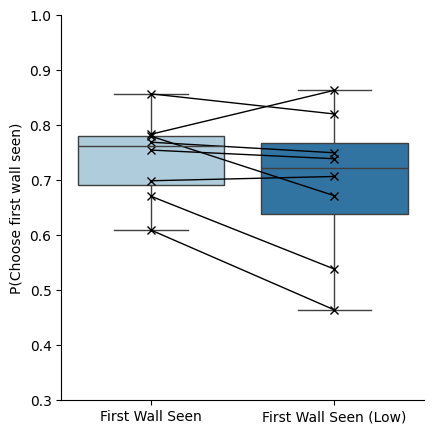

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


# Data arrays
first_wall_seen = np.array([
    [0.76923077, 0.75490196],
    [0.78378378, 0.67088608],
    [0.609375, 0.85714286],
    [0.69911504, 0.78014184]
])

first_wall_low = np.array([
    [0.75, 0.73913043],
    [0.86363636, 0.53846154],
    [0.46428571, 0.82051282],
    [0.70689655, 0.671875]
])

# Reshape data and create labels
data = np.concatenate([first_wall_seen.flatten(), first_wall_low.flatten()])
labels = ["First Wall Seen"] * first_wall_seen.size + ["First Wall Seen (Low)"] * first_wall_low.size

# Create DataFrame for Seaborn
df = pd.DataFrame({
    "Probability": data,
    "Condition": labels
})

# Generate distinct colors for each individual
colors = plt.cm.viridis(np.linspace(0, 1, (first_wall_seen).size))

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x="Condition", y="Probability", data=df, palette="Paired")
# Draw lines connecting paired data points
for i in range(first_wall_seen.size):
    plt.plot(
        ["First Wall Seen", "First Wall Seen (Low)"],  # x-coordinates
        [first_wall_seen.ravel()[i], first_wall_low.ravel()[i]],  # y-coordinates (mean of each pair)
        color='k',  # Get color from colormap
        linestyle='-',  # Solid line
        marker='x',  # Marker for the endpoints
        linewidth=1
    )

# plt.title("Probability of Choosing First Wall Seen vs. First Wall Seen (Low)")
plt.ylabel("P(Choose first wall seen)")
plt.xlabel("")
plt.ylim(0.3, 1)  # Set y-axis limits for probabilities
plt.gca().set_aspect(3)

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()